In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scienceplots
plt.style.use(['science', 'notebook'])
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from mpl_toolkits.mplot3d import axes3d


In [7]:
import torch
nsims=3
a = torch.zeros((1,nsims))
print(a)

escapedParticles = 1000
efficiency = (1-(escapedParticles/7000))*100
print(efficiency)

tensor([[0., 0., 0.]])
85.71428571428572


(150,)


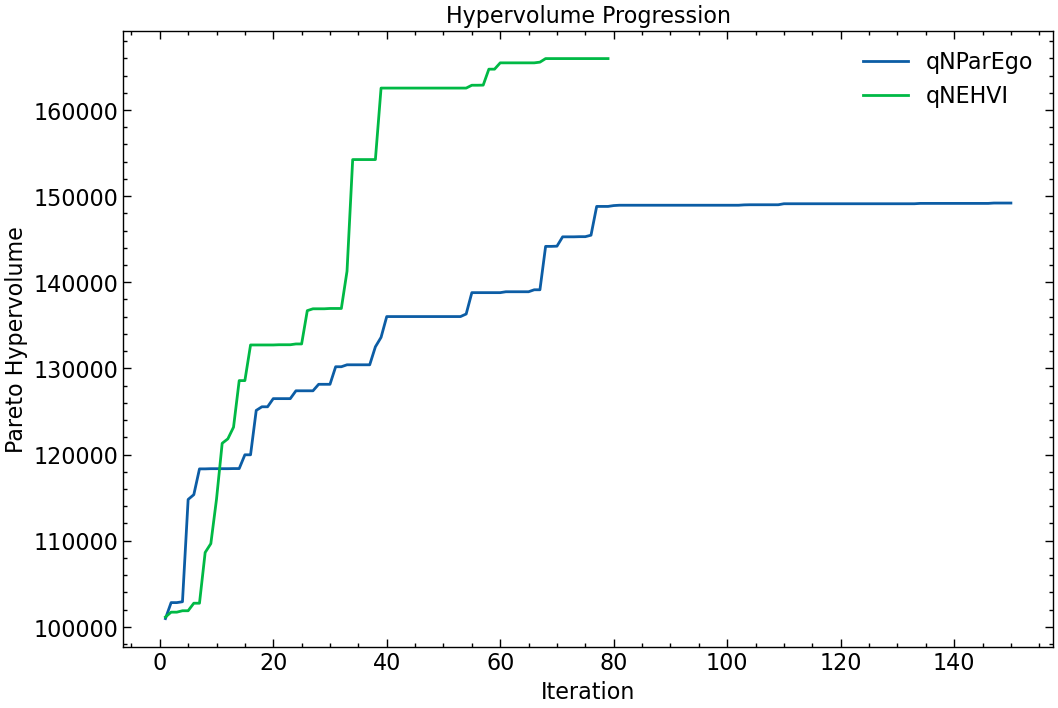

In [7]:
paregoHyp = np.loadtxt('parEgoHypervolumes.txt')
qNehviHyp = np.loadtxt('qNEHVIHypervolumes.txt')

print(paregoHyp.shape)

iterparEgo = np.linspace(1, 150, 150)
iterqNEHVI = np.linspace(1, 79, 79)
# print(iter)

plt.figure(figsize=(12,8))
plt.plot(iterparEgo, paregoHyp, label='qNParEgo')
plt.plot(iterqNEHVI, qNehviHyp, label='qNEHVI')
plt.xlabel('Iteration')
plt.ylabel('Pareto Hypervolume')
plt.legend()
plt.title('Hypervolume Progression')
plt.show()


In [4]:
def computeParetoShells(X):
    remaining = X.copy()
    shells = []

    while len(remaining) > 0:
        # Compute non-dominated front
        nds = NonDominatedSorting().do(remaining, only_non_dominated_front=True)
        paretoFront = remaining[nds]
        shells.append(paretoFront)

        # Remove selected Pareto front from remaining points
        remaining = np.delete(remaining, nds, axis=0)

    return shells

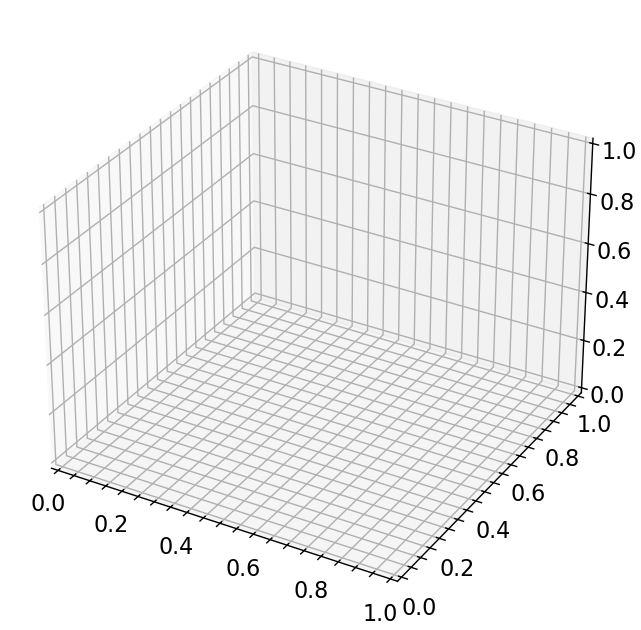

In [32]:
targets = np.loadtxt('coupledOptimisers/qNEHVIResults/targetsqNEHVI.txt')

targetsPareto = (computeParetoShells(targets*-1)[0])*-1

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = targets[:,0]
y = targets[:,1]
z = targets[:,2]

xp = targetsPareto[:,0]
yp = targetsPareto[:,1]
zp = targetsPareto[:,2]

xi = targets[:30,0]
yi = targets[:30,1]
zi = targets[:30,2]


for angle in range (0,180,5):
    # print(angle)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(x,y,z)
    ax.scatter(xi,yi,zi, c='r')
    ax.scatter(xp,yp,zp, marker='x', c='magenta')

    ax.set_xlabel('Flow Rate 1')
    ax.set_ylabel('Flow Rate 2')
    ax.set_zlabel('Flow Rate 3')
    ax.view_init(elev=0, azim=angle, roll=0)
    ax.set_box_aspect(None, zoom=0.9)
    ax.set_box_aspect(None, zoom=0.8)



    plt.draw()
    plt.savefig(f'3dParetoPlots/azim{angle}.png', bbox_inches=None, pad_inches=0)
    plt.close()

for angle in range (0,180,5):
    # print(angle)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(x,y,z)
    ax.scatter(xi,yi,zi, c='r')
    ax.scatter(xp,yp,zp, marker='x', c='magenta')

    ax.set_xlabel('Flow Rate 1')
    ax.set_ylabel('Flow Rate 2')
    ax.set_zlabel('Flow Rate 3')
    ax.view_init(elev=angle, azim=180, roll=0)
    ax.set_box_aspect(None, zoom=0.8)


    plt.draw()
    plt.savefig(f'3dParetoPlots/elev{angle}.png', bbox_inches=None, pad_inches=0)
    plt.close()
    # plt.show()

In [33]:
import imageio.v3 as iio
import os
import glob

# Directory where your PNGs are stored
folder = "3dParetoPlots"

# Get list of all png files, sorted numerically by angle
file_list = sorted(
    glob.glob(os.path.join(folder, "*.png")),
    key=os.path.getctime
)

# print(file_list)

for f in file_list:
    img = iio.imread(f)
    print(f, img.shape)

# Read in all images
images = [iio.imread(filename) for filename in file_list]
images = images + images[::-1]  # forward + backward loop

# Write them to a GIF (adjust fps or duration as you like)
iio.imwrite("3dParetoRotation.gif", images, duration=0.75)

3dParetoPlots/azim0.png (616, 616, 4)
3dParetoPlots/azim5.png (616, 616, 4)
3dParetoPlots/azim10.png (616, 616, 4)
3dParetoPlots/azim15.png (616, 616, 4)
3dParetoPlots/azim20.png (616, 616, 4)
3dParetoPlots/azim25.png (616, 616, 4)
3dParetoPlots/azim30.png (616, 616, 4)
3dParetoPlots/azim35.png (616, 616, 4)
3dParetoPlots/azim40.png (616, 616, 4)
3dParetoPlots/azim45.png (616, 616, 4)
3dParetoPlots/azim50.png (616, 616, 4)
3dParetoPlots/azim55.png (616, 616, 4)
3dParetoPlots/azim60.png (616, 616, 4)
3dParetoPlots/azim65.png (616, 616, 4)
3dParetoPlots/azim70.png (616, 616, 4)
3dParetoPlots/azim75.png (616, 616, 4)
3dParetoPlots/azim80.png (616, 616, 4)
3dParetoPlots/azim85.png (616, 616, 4)
3dParetoPlots/azim90.png (616, 616, 4)
3dParetoPlots/azim95.png (616, 616, 4)
3dParetoPlots/azim100.png (616, 616, 4)
3dParetoPlots/azim105.png (616, 616, 4)
3dParetoPlots/azim110.png (616, 616, 4)
3dParetoPlots/azim115.png (616, 616, 4)
3dParetoPlots/azim120.png (616, 616, 4)
3dParetoPlots/azim125.

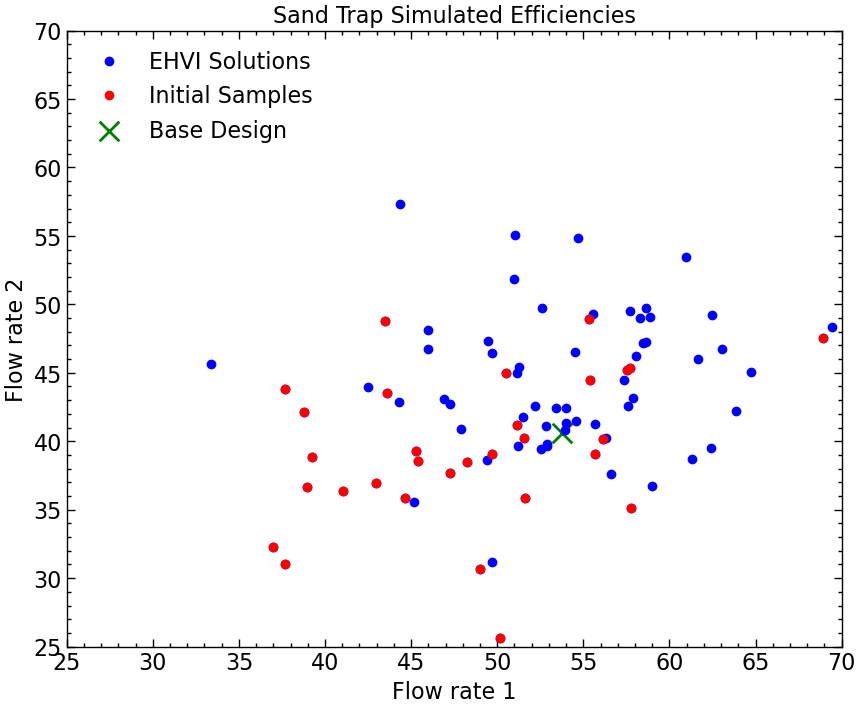

In [ ]:
targets = np.loadtxt('coupledOptimisers/qNEHVIResults/targetsqNEHVI.txt')

plt.figure(figsize=(10,8))
plt.plot(targets[:,0], targets[:,1], 'o', c='blue', label = 'EHVI Solutions')
# plot first five targets in red
plt.plot(targets[0:30,0], targets[0:30,1], 'ro', label='Initial Samples')
plt.scatter(53.74, 40.57, color='green', label='Base Design', marker='x', s=200)
plt.ylim(25,70)
plt.xlim(25,70)
plt.legend(loc='upper left')
plt.title('Sand Trap Simulated Efficiencies')
plt.xlabel('Flow rate 1')
plt.ylabel('Flow rate 2')
plt.show()

In [ ]:
def catmull(P):
    """
    A method to generate subdivision curves with given control points.

    Args:
        P (numpy array): control points.

    Returns:
        Q (numpy array): generated points on the subdivision curve.
    """
    N = P.shape[0]
    # print('N=', N)
    Q = np.zeros((2*N-1, 2), 'd')
    # print('Q shape =', Q.shape)
    Q[0,:] = P[0,:]
    for i in range(0,N-1):
        if i > 0:
            Q[2*i,:] = (P[i-1,:]+6*P[i,:]+P[i+1,:])/8
        Q[2*i+1,:] = (P[i,:]+P[i+1,:])/2
    Q[-1,:] = P[-1,:]


    return Q
    

def decision_vector_2d(n_points, ymin, ymax, xmin, xmax):

    y0 = ymax
    yfinal = -0.54
    x0 = xmin
    xfinal = xmax

    y_bounds = [ymin,ymax]
    x_bounds = [xmin,xmax]
    vertices = np.zeros((n_points,2))
    # vertices[0] = [x0, random.uniform(y_bounds[0], y_bounds[1])]
    # vertices[-1] = [xfinal, random.uniform(y_bounds[0], y_bounds[1])]
    vertices[0] = [x0, y0]
    vertices[-1] = [xfinal, yfinal]
    for i in range(1, n_points-1): 
        random_x = random.uniform(x_bounds[0], x_bounds[1])
        random_y = random.uniform(y_bounds[0], y_bounds[1])
        vertices[i] = [random_x, random_y]
    # print('unsorted', vertices)
    # vertices = np.sort(vertices, axis=0)

    # print(vertices)

    xCoords = vertices[:,0]
    yCoords = vertices[:,1]
    sortedX = np.sort(xCoords)

    # print(xCoords)
    # print(sortedX)



    # sortedVertices = [sortedX[i], yCoords[i]]

    sortedVertices = np.array((sortedX, yCoords)).T
    # print(sortedVertices.shape)
    # print(sortedVertices)

    # sorted_indices = np.argsort(vertices[:,0])
    # vertices = vertices[sorted_indices]
    # vertices = np.flip(vertices, axis=0)
    # print('sorted', vertices)

    return vertices

In [ ]:
def classifierDummyEval(x):
    for i in range(x.shape[0]-1):
        print('i=', i, x[i,0], x[i+1,0])
        if x[i,0] > x[i+1,0]+1:
            print('not sorted')
            return 1
    return 0

[[ 3.7         1.        ]
 [11.73164297  0.36701505]
 [14.82568644  0.88534777]
 [23.5        -0.54      ]]
i= 0 3.7 11.731642967671085
i= 1 11.731642967671085 14.825686441672033
i= 2 14.825686441672033 23.5
valid
[[ 3.7     1.    ]
 [ 9.99   -1.0208]
 [13.4885 -0.7868]
 [23.2306  0.6385]
 [23.5    -0.54  ]]
1
2
3
4
5
(129, 2)


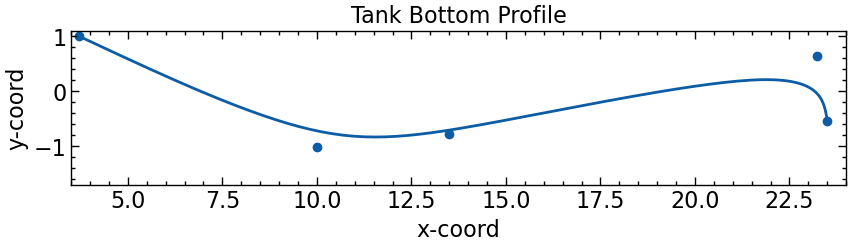

In [ ]:

valid = False
while not valid:
    vertices = decision_vector_2d(4, -1.54, 1, 3.7, 23.5)
    print(vertices)

    if classifierDummyEval(vertices) == 0:
        valid = True
        print('valid')
    else:
        print('invalid, regenerating')

# vertices = decision_vector_2d(6, -1.54, 1, 3.7, 23.5)
# vertices = decision_vector_2d(7, -0.636436, -0.252769, -0.383667, 0, -0.383667, -0.383667, 0, 0 )

vertices = [ 3.7, 1, 9.9900, -1.0208, 13.4885, -0.7868, 23.2306,  0.6385, 23.5, -0.54]
vertices = np.reshape(vertices, (5,2))

print(vertices)


catmull_points = vertices
catmull_curve_validity = True
i = 0
while i < 5:
    catmull_points = catmull(catmull_points)
    i +=1
    print(i)


# for i in range(0,len(catmull_points)):
#     catmull_points[i][0] = catmull_points[i][0] - 0.16747744

print(catmull_points.shape)

plt.figure(figsize=(10,2))
plt.plot(catmull_points[:,0], catmull_points[:,1])
plt.scatter(vertices[:,0], vertices[:,1])
plt.ylim(-1.7,1.1)
plt.xlim(3.5, 24)
plt.title('Tank Bottom Profile')
plt.xlabel('x-coord')
plt.ylabel('y-coord')
plt.show()

np.savetxt('spline.txt', catmull_points)

In [ ]:
from itertools import product
xyList = []

xpos = np.linspace(0.35, 0.66, 25)
ypos = np.linspace(1.01, 1.53, 20)

xyList = np.array(list(product(xpos, ypos)))
# x, y = np.meshgrid(xpos, ypos)

# print(xyList.shape)

# print(np.array(xyList))

# plt.scatter(xyList[:,0], xyList[:,1])
# plt.show()

toOF = np.empty((500,3))

for i in range(500):
    toOF[i] = [0, xyList[i,0], xyList[i,1]]

print(toOF)

print(toOF.shape)

import pandas as pd

df = pd.DataFrame(data=toOF)

print(df)

df.to_csv('positions.dat')

[[0.         0.35       1.01      ]
 [0.         0.35       1.03736842]
 [0.         0.35       1.06473684]
 ...
 [0.         0.66       1.47526316]
 [0.         0.66       1.50263158]
 [0.         0.66       1.53      ]]
(500, 3)


ModuleNotFoundError: No module named 'pandas'

In [ ]:
input_file = "positions.dat"
output_file = "positions2.dat"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        parts = line.strip().split(",")  # split by commas
        print(parts)
        row = parts[1:]                  # skip the first element (index)
        formatted = "(" + " ".join(row) + ")\n"
        outfile.write(formatted)

['', '0', '1', '2']
['0', '0.0', '0.35', '1.01']
['1', '0.0', '0.35', '1.0373684210526315']
['2', '0.0', '0.35', '1.0647368421052632']
['3', '0.0', '0.35', '1.0921052631578947']
['4', '0.0', '0.35', '1.1194736842105264']
['5', '0.0', '0.35', '1.1468421052631579']
['6', '0.0', '0.35', '1.1742105263157896']
['7', '0.0', '0.35', '1.201578947368421']
['8', '0.0', '0.35', '1.2289473684210526']
['9', '0.0', '0.35', '1.2563157894736843']
['10', '0.0', '0.35', '1.2836842105263158']
['11', '0.0', '0.35', '1.3110526315789475']
['12', '0.0', '0.35', '1.338421052631579']
['13', '0.0', '0.35', '1.3657894736842104']
['14', '0.0', '0.35', '1.3931578947368422']
['15', '0.0', '0.35', '1.4205263157894736']
['16', '0.0', '0.35', '1.4478947368421053']
['17', '0.0', '0.35', '1.4752631578947368']
['18', '0.0', '0.35', '1.5026315789473683']
['19', '0.0', '0.35', '1.53']
['20', '0.0', '0.36291666666666667', '1.01']
['21', '0.0', '0.36291666666666667', '1.0373684210526315']
['22', '0.0', '0.36291666666666667',

In [ ]:
features = np.loadtxt('features.txt')
print(features)
print(features.shape)

features = np.reshape(features, (2,5,8))

print(features)
print(features.shape)

[[ 9.48886917 -1.2063816  14.11849373 ... -0.84544019  8.94967724
  -1.19962144]
 [ 9.48886917 -1.2063816  14.11849373 ... -0.84544019  7.70971784
  -1.19962144]
 [ 9.48886917 -1.2063816   7.70971784 ... -0.84544019  8.94967724
  -1.19962144]
 ...
 [20.21301099 -0.11374029  6.19663621 ... -1.03389699  4.9195528
  -0.60246623]
 [20.21301099 -0.11374029 19.49329566 ... -1.03389699  4.9195528
  -0.60246623]
 [20.21301099 -0.11374029 19.49329566 ... -1.03389699  6.19663621
  -0.60246623]]
(240, 8)


ValueError: cannot reshape array of size 1920 into shape (2,5,8)

In [ ]:
targets = np.loadtxt('targetList.txt')
print(targets.shape)

(2, 5)


In [ ]:
lbX = 3.7
lbY = -1.54

ubX = 23.5
ubY = 1


bounds = []

for i in range(4):
    bounds.append([lbX, ubX])
    bounds.append([lbY, ubY])


bounds = np.array(bounds)
print(bounds.T)
# print(np.reshape(bounds, (8,2)))
lowBounds = bounds[:, 0]
highBounds = bounds[:, 1]
print(lowBounds, highBounds)

[[ 3.7  -1.54  3.7  -1.54  3.7  -1.54  3.7  -1.54]
 [23.5   1.   23.5   1.   23.5   1.   23.5   1.  ]]
[ 3.7  -1.54  3.7  -1.54  3.7  -1.54  3.7  -1.54] [23.5  1.  23.5  1.  23.5  1.  23.5  1. ]


In [ ]:
import torch
new_obj = 3.34
eval_objective_indices = [0]
new_obj = torch.from_numpy(np.array(new_obj))
new_obj = new_obj[..., eval_objective_indices]

IndexError: too many indices for tensor of dimension 0

In [ ]:
import numpy as np

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

# Function to find the possible permutations. 
# Initial value of idx is 0.
def permutations(res, arr, idx):
  
    # Base case: if idx reaches the size of the array,
    # add the permutation to the result
    if idx == len(arr):
        res.append(arr[:])
        return

    # Permutations made by swapping each element
    for i in range(idx, len(arr)):
        swap(arr, idx, i)
        permutations(res, arr, idx + 1)
        swap(arr, idx, i)  # Backtracking

# Function to get the permutations
def permute(arr):
    res = []
    permutations(res, arr, 0)
    return res


feature = np.array((1.314487124876760404e+01, 1.077573318018421045e-01, 9.569911402853602311e+00, -7.494928797286617428e-01, 
           2.126594419209196829e+01, -3.067428591320791043e-01, 1.219784956854633506e+01, -1.115762249437828313e-01))


target = 4.453575515747070312e+01
# print(target.shape)
features = feature


feature = np.reshape(feature, (int(len(feature)/2), 2))

res = np.array(permute(list(feature[:,0])))
print(res)

for i in range(1,len(res)):
    linkedArray = np.reshape(np.vstack((res[i], feature[:,1])).T, (8,))
    
    features = np.vstack((features, linkedArray))

targets = np.full((len(res),), fill_value=target)
# print(linkedArray)
# print(linkedArray.shape)

[[13.14487125  9.5699114  21.26594419 12.19784957]
 [13.14487125  9.5699114  12.19784957 21.26594419]
 [13.14487125 21.26594419  9.5699114  12.19784957]
 [13.14487125 21.26594419 12.19784957  9.5699114 ]
 [13.14487125 12.19784957 21.26594419  9.5699114 ]
 [13.14487125 12.19784957  9.5699114  21.26594419]
 [ 9.5699114  13.14487125 21.26594419 12.19784957]
 [ 9.5699114  13.14487125 12.19784957 21.26594419]
 [ 9.5699114  21.26594419 13.14487125 12.19784957]
 [ 9.5699114  21.26594419 12.19784957 13.14487125]
 [ 9.5699114  12.19784957 21.26594419 13.14487125]
 [ 9.5699114  12.19784957 13.14487125 21.26594419]
 [21.26594419  9.5699114  13.14487125 12.19784957]
 [21.26594419  9.5699114  12.19784957 13.14487125]
 [21.26594419 13.14487125  9.5699114  12.19784957]
 [21.26594419 13.14487125 12.19784957  9.5699114 ]
 [21.26594419 12.19784957 13.14487125  9.5699114 ]
 [21.26594419 12.19784957  9.5699114  13.14487125]
 [12.19784957  9.5699114  21.26594419 13.14487125]
 [12.19784957  9.5699114  13.14

In [ ]:
# Function to swap elements in the array
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

# Function to find the possible permutations. 
# Initial value of idx is 0.
def permutations(res, arr, idx):
  
    # Base case: if idx reaches the size of the array,
    # add the permutation to the result
    if idx == len(arr):
        res.append(arr[:])
        return

    # Permutations made by swapping each element
    for i in range(idx, len(arr)):
        swap(arr, idx, i)
        permutations(res, arr, idx + 1)
        swap(arr, idx, i)  # Backtracking

# Function to get the permutations
def permute(arr):
    res = []
    permutations(res, arr, 0)
    return res

# Driver code
arr = [1, 2, 3]
print(arr.shape)
res = permute(arr)

# Printing result
for perm in res:
    print(" ".join(map(str, perm)))

AttributeError: 'list' object has no attribute 'shape'